# Template For LSTM

## import the nessecary librarys

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## read in ask and bid prices

In [2]:
ask = pd.read_csv("XAGUSD_5 Mins_Ask_2023.01.01_2023.06.30.csv")
bid = pd.read_csv("XAGUSD_5 Mins_Bid_2023.01.01_2023.06.30.csv")

## merge data into 1 set

In [3]:
data = bid.merge(ask, left_on='Time (UTC)', right_on='Time (UTC)', how='outer')
data

,Time (UTC),Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y
0,2023.01.02 23:00:00,24.036,24.059,24.017,24.059,0.3480,24.102,24.125,24.083,24.125,0.3510
1,2023.01.02 23:05:00,24.064,24.130,24.064,24.092,1.8458,24.094,24.188,24.094,24.141,1.1550
2,2023.01.02 23:10:00,24.094,24.098,23.972,23.977,0.9030,24.143,24.148,24.022,24.027,0.8820
3,2023.01.02 23:15:00,23.977,23.980,23.938,23.980,0.8940,24.026,24.028,23.986,24.028,0.8940
4,2023.01.02 23:20:00,23.978,24.024,23.976,24.023,0.8880,24.026,24.073,24.023,24.073,0.9044
...,...,...,...,...,...,...,...,...,...,...,...
35215,2023.06.30 20:35:00,22.752,22.752,22.741,22.746,0.2752,22.782,22.782,22.771,22.776,1.8002
35216,2023.06.30 20:40:00,22.736,22.751,22.736,22.746,0.1410,22.775,22.781,22.775,22.776,0.7568
35217,2023.06.30 20:45:00,22.751,22.751,22.746,22.746,0.0690,22.781,22.781,22.776,22.776,0.4212
35218,2023.06.30 20:50:00,22.746,22.761,22.736,22.756,0.2160,22.776,22.797,22.774,22.786,0.6836


## show data info

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (UTC)  35220 non-null  object 
 1   Open_x      35220 non-null  float64
 2   High_x      35220 non-null  float64
 3   Low_x       35220 non-null  float64
 4   Close_x     35220 non-null  float64
 5   Volume _x   35220 non-null  float64
 6   Open_y      35220 non-null  float64
 7   High_y      35220 non-null  float64
 8   Low_y       35220 non-null  float64
 9   Close_y     35220 non-null  float64
 10  Volume _y   35220 non-null  float64
dtypes: float64(10), object(1)
memory usage: 3.0+ MB


## rename data columns

In [5]:
data.columns = ['Local time', 'Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid', 
                   'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask']

## calculate the deltas

In [6]:
data["Volume_Delta"] = data["Volume_Ask"] - data["Volume_Bid"]
data["Volume_Delta_abs"] = (data["Volume_Ask"] - data["Volume_Bid"]).abs()
data["Open_Delta"] = data["Open_Ask"]  - data["Open_Bid"]
data["High_Delta"] = data["High_Ask"]  - data["High_Bid"]
data["Low_Delta"]  = data["Low_Ask"]   - data["Low_Bid"]
data["Close_Delta"]= data["Close_Ask"] - data["Close_Bid"]

## drop ask prices

In [7]:
data=data.drop(['Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask'], axis=1)

## import datetime library

In [8]:
import datetime

## make local time column a datetime object

In [9]:
data['Local time'] = pd.to_datetime(data['Local time'], utc=True)

## plot silver prices

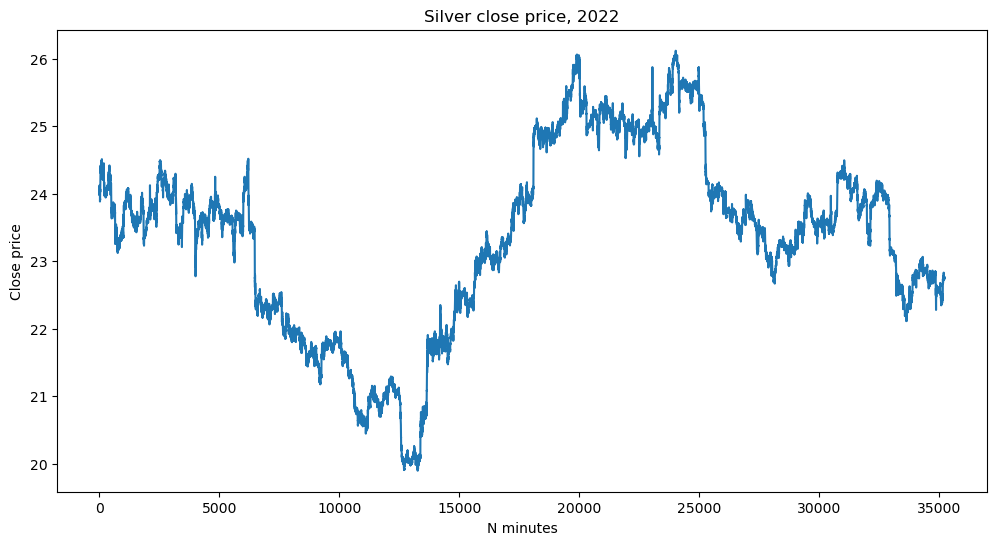

In [10]:
plt.figure(figsize=(12,6))
plt.plot(data['Close_Bid'])
plt.title('Silver close price, 2022')
plt.xlabel('N minutes')
plt.ylabel('Close price')
plt.show()

## plot silver volume price

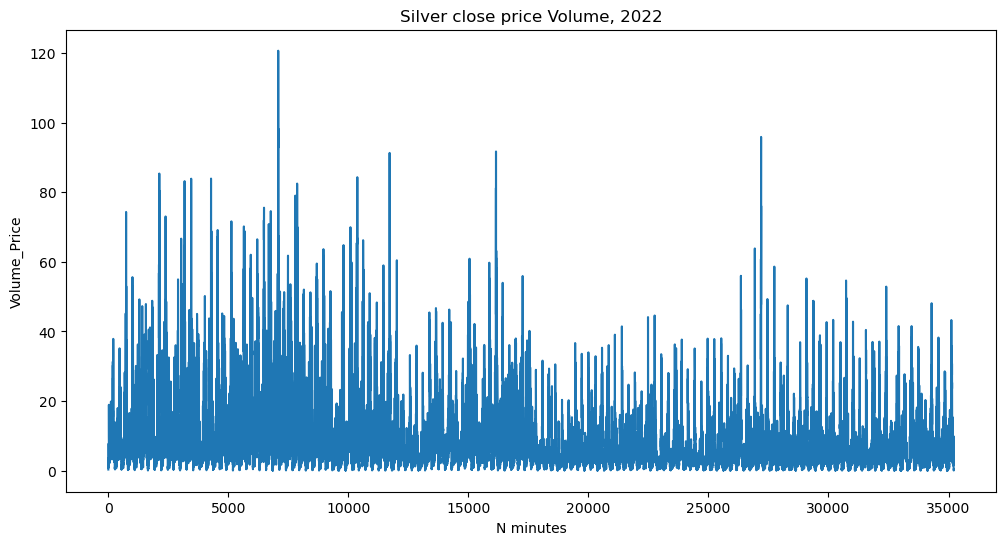

In [11]:
plt.figure(figsize=(12,6))
plt.plot(data['Volume_Bid'])
plt.title('Silver close price Volume, 2022')
plt.xlabel('N minutes')
plt.ylabel('Volume_Price')
plt.show()

## create data 2 with no local time

In [12]:
data2 = data.drop(['Local time'],axis=1)

## generate data length variable

In [13]:
data_length = len(data)
data_length

35220

## create train size variable

In [14]:
train_size = int(round(data_length*0.9, -3))
train_size

32000

## create data 2 Y variables

In [15]:
data2['Y_High_Bid'] = data2['High_Bid']
data2['Y_Low_Ask'] = data2['Low_Bid'] + data2['Low_Delta']

## create train data

In [16]:
train = data2.iloc[:train_size]
train.shape

(32000, 14)

## create max price variable

In [17]:
max_price = (train['High_Bid'] + train['High_Delta']).max()
max_price

26.153

## create min price variable

In [18]:
min_price = train['Low_Bid'].min()
min_price

19.888

## create max volume variable

In [19]:
max_volume = max(max(train['Volume_Bid']), max(train['Volume_Ask']))
max_volume

365.6322

## create max delta variable

In [20]:
max_Delta = max(max(train['Open_Delta']), max(train['High_Delta']), max(train['Low_Delta']), max(train['Close_Delta']))
max_Delta = round(max_Delta, 3)
max_Delta

0.409

## create min delta variable

In [21]:
min_Delta = min(min(train['Open_Delta']), min(train['High_Delta']), min(train['Low_Delta']), min(train['Close_Delta']))
min_Delta = round(min_Delta, 3)
min_Delta

0.001

## create min volume delta variable

In [22]:
min_volume_Delta = train['Volume_Delta'].min()
min_volume_Delta

-48.7912

## create max volume delta variable

In [23]:
max_volume_Delta = train['Volume_Delta'].max()
max_volume_Delta

317.5858

## create max volume delta abs variable

In [24]:
max_volume_Delta_abs = train['Volume_Delta_abs'].max()
max_volume_Delta_abs

317.5858

## create min volume delta abs variable

In [25]:
min_volume_Delta_abs = train['Volume_Delta_abs'].min()
min_volume_Delta_abs

0.0

## Normalize data

In [26]:
data2['Open_Bid'] = ( data2['Open_Bid'] - min_price ) / (max_price-min_price)
data2['High_Bid']  = ( data2['High_Bid']  - min_price ) / (max_price-min_price)
data2['Low_Bid']   = ( data2['Low_Bid']   - min_price ) / (max_price-min_price)
data2['Close_Bid'] = ( data2['Close_Bid'] - min_price ) / (max_price-min_price)
data2['Y_High_Bid'] = ( data2['Y_High_Bid'] - min_price ) / (max_price-min_price)
data2['Y_Low_Ask']  = ( data2['Y_Low_Ask']  - min_price ) / (max_price-min_price)

## normalize volume data

In [27]:
data2['Volume_Ask']  = data2['Volume_Ask'] / max_volume
data2['Volume_Bid']  = data2['Volume_Bid'] / max_volume

## normalize volume delta

In [28]:
data2['Volume_Delta'] = ( data2['Volume_Delta'] - min_volume_Delta ) / (max_volume_Delta-min_volume_Delta)

## normalize volume delta abs

In [29]:
data2['Volume_Delta_abs']  = data2['Volume_Delta_abs'] / max_volume_Delta_abs

## normalize deltas

In [30]:
data2['Open_Delta']  = ( max_Delta - data2['Open_Delta'] )  / (max_Delta-min_Delta)
data2['High_Delta']  = ( max_Delta - data2['High_Delta'] )  / (max_Delta-min_Delta)
data2['Low_Delta']   = ( max_Delta - data2['Low_Delta'] )   / (max_Delta-min_Delta)
data2['Close_Delta'] = ( max_Delta - data2['Close_Delta'] ) / (max_Delta-min_Delta)

In [31]:
data_ax = data2.drop(['Y_High_Bid', 'Y_Low_Ask'], axis=1)


In [32]:
data_ay = data2[['Y_High_Bid', 'Y_Low_Ask']]

In [33]:
data_ay = data_ay.shift(-1)

In [34]:
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=5)

data_ay['Y_High_Bid_5'] = data_ay['Y_High_Bid'].rolling(window=indexer).max()
data_ay['Y_Low_Ask_5']  = data_ay['Y_Low_Ask'].rolling(window=indexer).min()

In [35]:
data_ay = data_ay.drop(['Y_High_Bid', 'Y_Low_Ask'], axis=1)

In [36]:
for i in range(5):
        data_ay.drop(data_ay.shape[0]-1, axis=0, inplace=True)
        data_ax.drop(data_ay.shape[0]-1, axis=0, inplace=True)

In [37]:
# Create inputs Numpy

data_a = np.array(data_ax) 

with np.printoptions(precision=4):
    print("data_a:")
    print(data_a[:2,:])  
    print('\n')
    print(data_a[-2:,:]) 

print("numpy size: = ", data_a.shape)
print("type: ", data_a.dtype) 


data_a:
[[6.6209e-01 6.6576e-01 6.5906e-01 6.6576e-01 9.5178e-04 9.5998e-04
  1.3318e-01 9.4463e-06 8.4069e-01 8.4069e-01 8.4069e-01 8.4069e-01]
 [6.6656e-01 6.7709e-01 6.6656e-01 6.7103e-01 5.0482e-03 3.1589e-03
  1.3129e-01 2.1752e-03 9.2892e-01 8.6029e-01 9.2892e-01 8.8235e-01]]


[[4.5411e-01 4.5634e-01 4.5331e-01 4.5555e-01 5.2695e-03 9.5377e-03
  1.3743e-01 4.9139e-03 9.2892e-01 9.2892e-01 9.2892e-01 9.2892e-01]
 [4.5778e-01 4.5938e-01 4.4900e-01 4.5603e-01 8.9434e-04 1.0152e-03
  1.3329e-01 1.3917e-04 9.2892e-01 8.9216e-01 7.9412e-01 8.4069e-01]]
numpy size: =  (35215, 12)
type:  float64


In [38]:
# Create outputs Numpy

data_y = np.array(data_ay) 

print("data_a:")
print(data_y[:3,:])  
print('\n')
print(data_y[-3:,:]) 

print("numpy size: = ", data_y.shape)
print("type: ", data_y.dtype) 

data_a:
[[0.67709497 0.65411014]
 [0.67246608 0.65411014]
 [0.67246608 0.65411014]]


[[0.45714286 0.45810056]
 [0.45857941 0.45985634]
 [0.45937749 0.46017558]]
numpy size: =  (35215, 2)
type:  float64


In [39]:
from tqdm import tqdm
n_small = 30000
N=50
L=n_small-N
t=data_a.shape[1]
print('Size of a three dimensional inputs tensor: ', L,N,t)

Size of a three dimensional inputs tensor:  29950 50 12


In [40]:
data_b = np.zeros( (L, N, t), dtype= 'float32' ) 
Y = np.zeros((L, 2), dtype= 'float32') 

In [41]:
# fill the imputs 3D tansor (data_b) 
# and the array of answers Y 

#print('L = n - N = ', n-N, L)
print('L = n_small - N - 5 = ', n_small-N-5, L)
#for k in tqdm(range(L-1)):
for k in tqdm(range(L)):
    data_b[k, :, :] = data_a[k:k+N, :]   
                                          
    Y[k,0] = data_y[k+N-1,0]   # normalised Y_High_Bid - max 5 minutes future price
    Y[k,1] = data_y[k+N-1,1]   # normalised Y_Low_Ask -  min 5 minutes future price

print(k) # index value (for control)
    
print('data_b:', '\n', data_b)
print("Numpy size:        ", data_b.shape, '\n')

print( Y[:5,:])
print( Y[-10:,:])
print(      "Numpy size:         ", Y.shape)

L = n_small - N - 5 =  29945 29950


100%|██████████| 29950/29950 [00:00<00:00, 144889.41it/s]

29949
data_b: 
 [[[0.66209096 0.6657622  0.6590583  ... 0.84068626 0.84068626 0.84068626]
  [0.66656023 0.677095   0.66656023 ... 0.8602941  0.9289216  0.88235295]
  [0.67134875 0.67198724 0.6518755  ... 0.87990195 0.87990195 0.87990195]
  ...
  [0.69114125 0.6964086  0.6901836  ... 0.9289216  0.9289216  0.9289216 ]
  [0.6936951  0.6970471  0.6914605  ... 0.9387255  0.9289216  0.9289216 ]
  [0.6952913  0.7122107  0.694174   ... 0.9289216  0.9289216  0.9289216 ]]

 [[0.66656023 0.677095   0.66656023 ... 0.8602941  0.9289216  0.88235295]
  [0.67134875 0.67198724 0.6518755  ... 0.87990195 0.87990195 0.87990195]
  [0.6526736  0.6531524  0.64644855 ... 0.88480395 0.88480395 0.88480395]
  ...
  [0.6936951  0.6970471  0.6914605  ... 0.9387255  0.9289216  0.9289216 ]
  [0.6952913  0.7122107  0.694174   ... 0.9289216  0.9289216  0.9289216 ]
  [0.7114126  0.7122107  0.7056664  ... 0.9289216  0.9289216  0.9289216 ]]

 [[0.67134875 0.67198724 0.6518755  ... 0.87990195 0.87990195 0.87990195]
  [0.6

In [42]:
# Control of the correctness of filling the array Y 
# (should show MAX of the normalised prices High_Bid and Low_Ask - during 5 next minutes(step) ahead)


import random

pp = random.randint(50, L) # (any number before 29950) - just to look at the middle of data_b
print('random int = ', pp)

print('data_b:', '\t\t','Y:')
print('Y_High_Bid ','\t\t','Y_High_Bid')

for i in range(15):
    print(data_b[pp+i,N-1,1], '\t\t', Y[pp+i,0])

random int =  1251
data_b: 		 Y:
Y_High_Bid  		 Y_High_Bid
0.64485234 		 0.6426177
0.6426177 		 0.6493216
0.6392658 		 0.64948124
0.6399042 		 0.64948124
0.6424581 		 0.64948124
0.63974464 		 0.64948124
0.6493216 		 0.64948124
0.64948124 		 0.64868313
0.64868313 		 0.64868313
0.64868313 		 0.6419793
0.6419793 		 0.639585
0.639585 		 0.63575417
0.63575417 		 0.63320035
0.63320035 		 0.63351953
0.62857145 		 0.63351953


In [43]:
data = []
data_ax = []
data_ay = []
data_a = []
data_y = []

In [44]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

X_train, X_test, y_train, y_test = train_test_split(data_b, Y, test_size=0.1, shuffle=False, stratify=None, random_state=101)

print(data_b.shape)

(29950, 50, 12)


In [45]:
model = keras.Sequential([
    keras.layers.LSTM(100, activation='relu', input_shape=(50, 12)),
    keras.layers.Dense(2)
])

C:\Users\fredd\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        45,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,402 (177.35 KB)

 Trainable params: 45,402 (177.35 KB)

 Non-trainable params: 0 (0.00 B)

None


In [47]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [48]:
# Early Stopping parameters

es = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)
mc = ModelCheckpoint('best_model_LSTM_GOLD.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [49]:
history = model.fit(X_train, y_train, batch_size=20, epochs=20, validation_split=0.1, shuffle=True, verbose=1, callbacks=[es, mc])

Epoch 1/20
1212/1213 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0075 - mae: 0.0277
Epoch 1: val_loss improved from inf to 0.00009, saving model to best_model_LSTM_GOLD.keras
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 44s 35ms/step - loss: 0.0075 - mae: 0.0277 - val_loss: 9.0584e-05 - val_mae: 0.0071
Epoch 2/20
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 9.0442e-05 - mae: 0.0067
Epoch 2: val_loss improved from 0.00009 to 0.00007, saving model to best_model_LSTM_GOLD.keras
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 43s 35ms/step - loss: 9.0446e-05 - mae: 0.0067 - val_loss: 6.9581e-05 - val_mae: 0.0052
Epoch 3/20
1212/1213 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9.0379e-05 - mae: 0.0067
Epoch 3: val_loss did not improve from 0.00007
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 44s 36ms/step - loss: 9.0373e-05 - mae: 0.0067 - val_loss: 1.0004e-04 - val_mae: 0.0077
Epoch 4/20
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 8.3456e-05 - mae: 0.0065
Epoch 4: val_loss improved from 0.00007 to 0.00006, saving model t

In [50]:
LSTM_saved_best_model = keras.models.load_model('best_model_LSTM_GOLD.keras')

In [51]:
# Evaluate the quality of network training on test data, which the network has NOT seen.

scores = LSTM_saved_best_model.evaluate(X_test, y_test, verbose=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.6947e-05 - mae: 0.0037


In [52]:
print("Mean squared error (mse): %.9f " % (scores[0]))
print("Mean absolute error (mae): %.9f " % (scores[1]))

Mean squared error (mse): 0.000030586 
Mean absolute error (mae): 0.003810658 


Text(0.5, 0, 'Mean squared error')

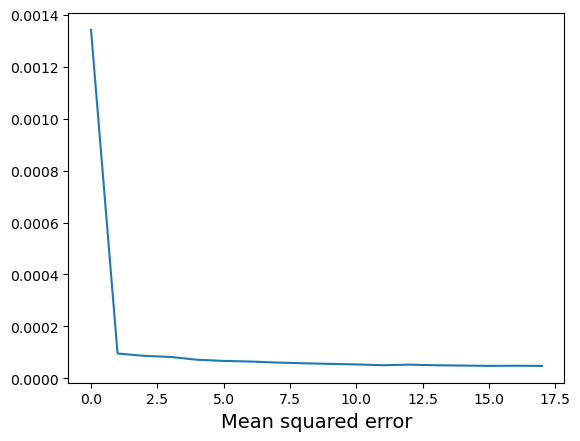

In [53]:
plt.plot(history.history['loss'])
plt.xlabel('Mean squared error', size=14)

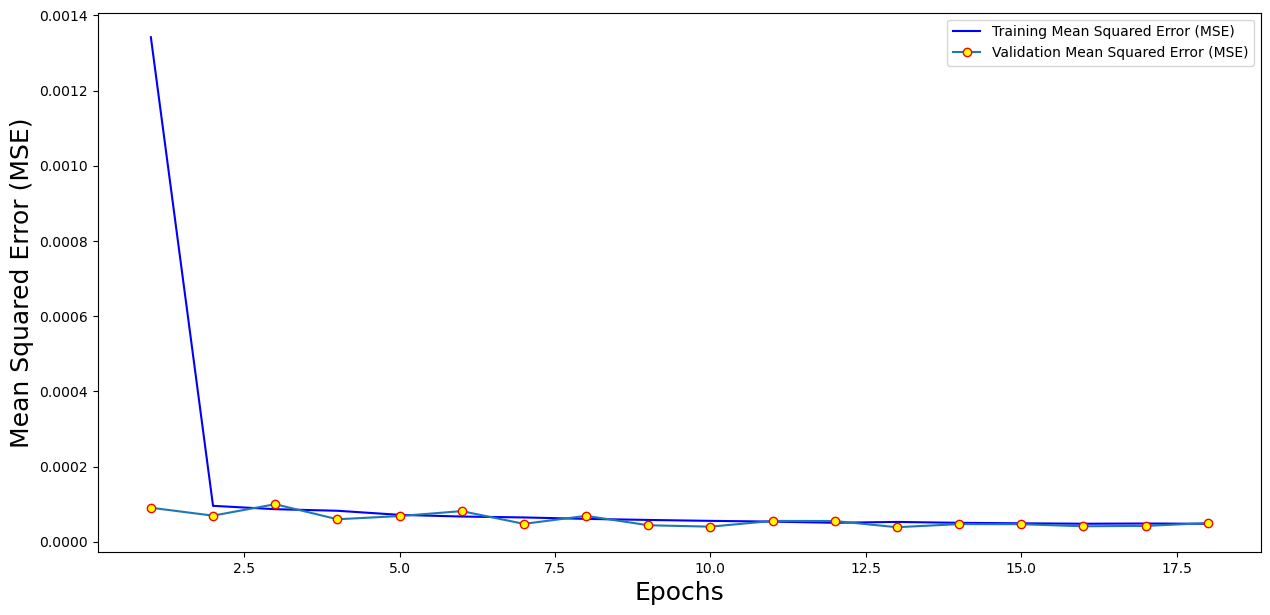

In [54]:
# More detailed MSE graph

history_dict = history.history

mse_values = history_dict['loss']
val_mse_values = history_dict['val_loss']

epochs = range(1, len(mse_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mse_values, 'b', label='Training Mean Squared Error (MSE)')
plt.plot(epochs, val_mse_values, marker='o', markeredgecolor='red', markerfacecolor='yellow', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Squared Error (MSE)', size=18)
plt.legend()
plt.show()

In [55]:
pred = model.predict(X_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


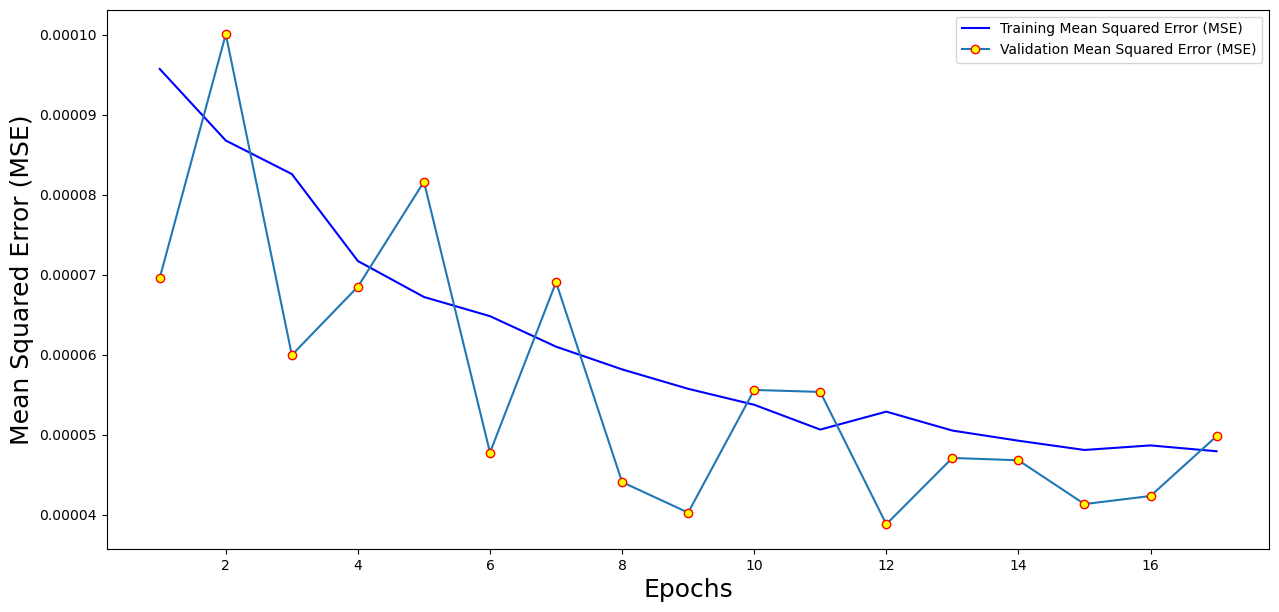

In [56]:
# deleted the 1st epoch
# to examine in detail the results of the remaining epochs

history_dict = history.history

mse_values = history_dict['loss'][1:]
val_mse_values = history_dict['val_loss'][1:]

epochs = range(1, len(mse_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mse_values, 'b', label='Training Mean Squared Error (MSE)')
plt.plot(epochs, val_mse_values, marker='o', markeredgecolor='red', markerfacecolor='yellow', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Squared Error (MSE)', size=18)
plt.legend()
plt.show()

## Plot real and predicted normalized prices

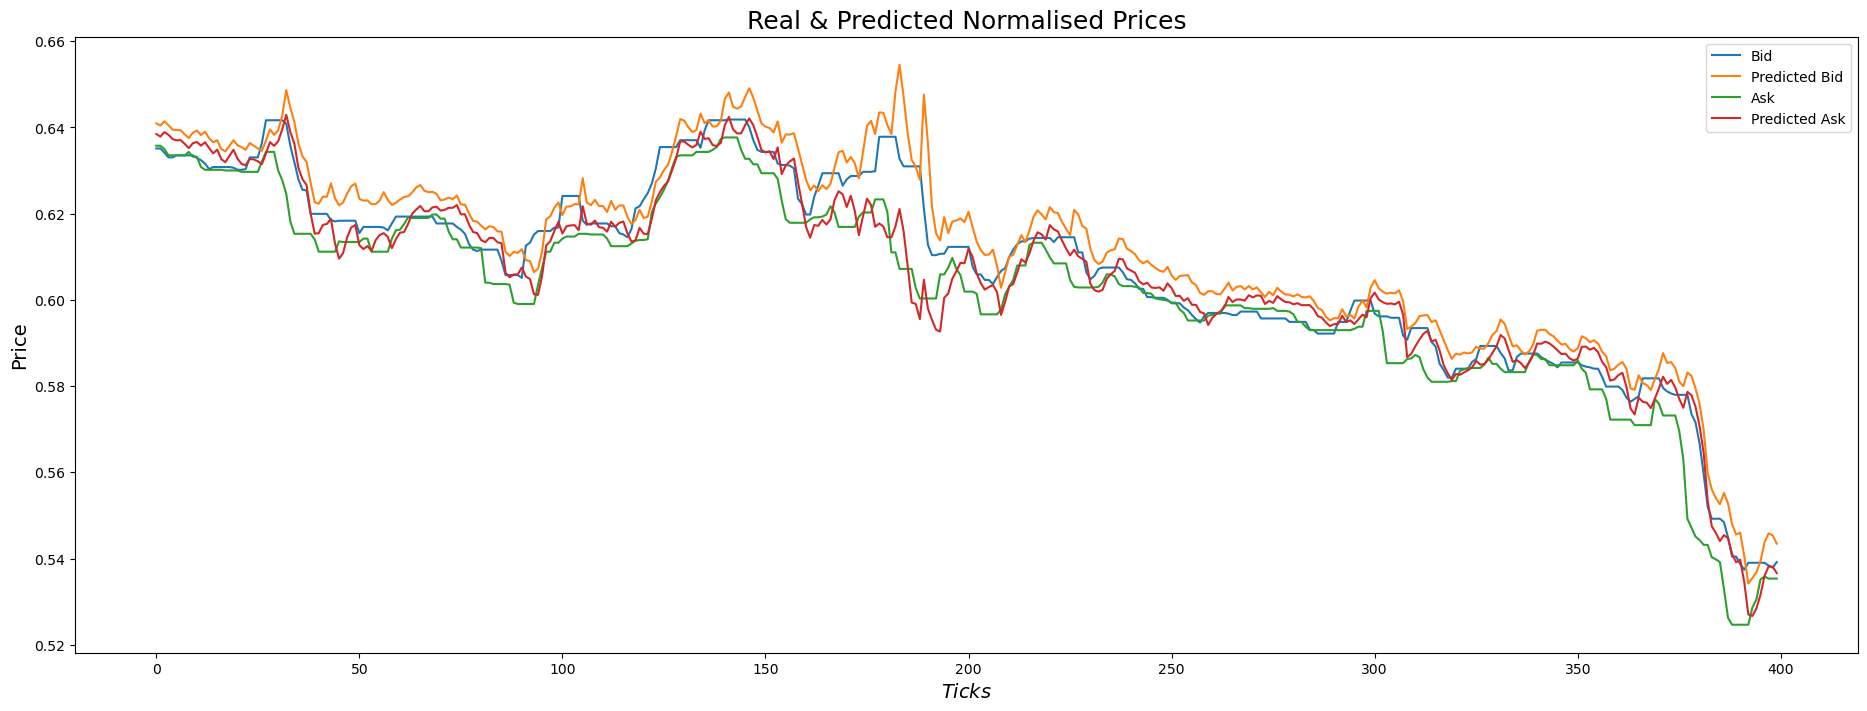

In [57]:
plt.ion()
fig = plt.figure(figsize=(23,8))
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test[:400,0], label='Bid')
line2, = ax1.plot(pred[:400,0], label='Predicted Bid')
line3, = ax1.plot(y_test[0:400,1], label='Ask')
line1, = ax1.plot(pred[:400,1], label='Predicted Ask')

plt.title('Real & Predicted Normalised Prices', size=18)
plt.ylabel('Price', size=14)
plt.xlabel('$Ticks$', size=14)
plt.legend(loc='upper right')
plt.show()

## Plot the error chart

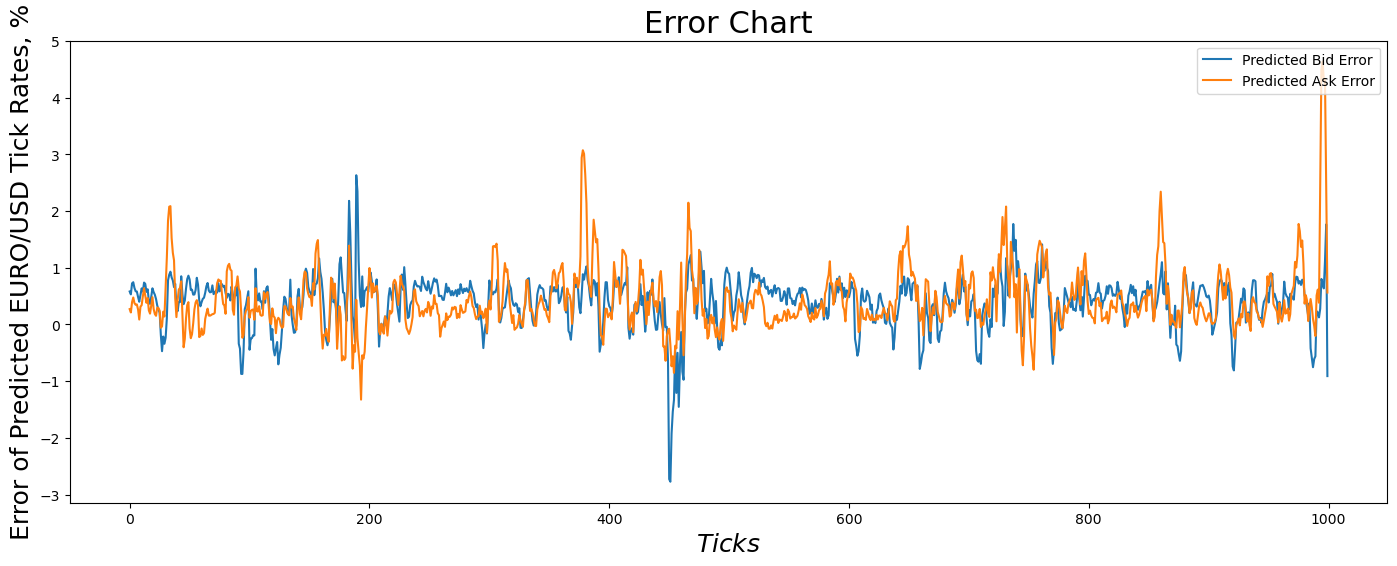

In [58]:
N1=0     # start
N2=1000   # end

plt.ion()
fig = plt.figure(figsize=(17,6))
ax1 = fig.add_subplot(111)

a = (pred[N1:N2,0]-y_test[N1:N2,0])*100
b = (pred[N1:N2,1]-y_test[N1:N2,1])*100

line1, = ax1.plot(a, label='Predicted Bid Error')
line2, = ax1.plot(b, label='Predicted Ask Error')

plt.title('Error Chart', size=22)
plt.ylabel('Error of Predicted EURO/USD Tick Rates, %', size=18)
plt.xlabel('$Ticks$', size=18)
plt.legend(loc='upper right') 

plt.show()